<a href="https://colab.research.google.com/github/jhguay/base_ouverte/blob/main/VoteDemocrate2008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exemple simplifié de l'usage du machine learning à partir de données statistiques: exemple de base les iris**



**Première** étape: les éléments préparatoires

**Deuxième** étape: la sélection et la transformation des données pour l'utilisation des algorithmes

**Troisième** étape: l'application de l'algorithme choisi et la visualisation des résultats

# **Première étape: les éléments préparatoires**


In [2]:
#Importation des prémières bibliothèques utilisées
import scipy # bibliothèque de calcul scientifique 
import matplotlib # bibliothèque d'affichage graphique
import sklearn # bibliothèque d'algorithmes "classiques" d'apprentissage automatique 
from numpy import * # bibliothèque de calcul matriciel
from pandas import * # bibliothèque de manipulation de tableaux de données
from sklearn import * # bibliothèque d'algorithmes "classiques" d'apprentissage automatique
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from pandas import DataFrame, read_csv
%matplotlib inline
import IPython
import sys 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Inspiration: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/


In [ ]:
#Création d'une méthode utiltérieurement utilisées pour l'affichage des données
def afficher_matrice_confusion(cm, noms_etiquettes = [u'classe - 0', u'classe - 1', u'classe - 3'],
                   titre=u'Matrice de confusion'):

    print("\n",cm,"\n")
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title(titre)
    plt.colorbar()
    tick_marks = np.arange(len(noms_etiquettes))
    plt.xticks(tick_marks, noms_etiquettes, rotation=60)
    plt.yticks(tick_marks, noms_etiquettes)
    plt.ylabel(u'Vraie étiquette')
    plt.xlabel(u'Étiquette prédite')
    # Fonction d'ajustement
    plt.tight_layout()
    plt.show()

In [ ]:
'''
import os
GERME_ALEATOIRE = 21
os.environ['PYTHONHASHSEED'] = str(GERME_ALEATOIRE)
import random
random.seed(GERME_ALEATOIRE)
import numpy as np
np.random.seed(GERME_ALEATOIRE)
'''

"\nimport os\nGERME_ALEATOIRE = 21\nos.environ['PYTHONHASHSEED'] = str(GERME_ALEATOIRE)\nimport random\nrandom.seed(GERME_ALEATOIRE)\nimport numpy as np\nnp.random.seed(GERME_ALEATOIRE)\n"

In [4]:
# Lecture des données
# Création d'une liste de noms d'attributs en français
noms_attributs = ["longueur_sépales","largeur_sépales","longueur_pétales","largeur_pétales", "espèce"]
donnees_initiales_df = pd.read_csv("https://dimension.usherbrooke.ca/donnees/baseAnes2016.csv")






In [ ]:
#Visualisation des données
donnees_initiales_df.head()

In [6]:
# Vérification des formats
donnees_initiales_df.shape

(4271, 1123)

In [7]:
donnees_initiales_df.columns

Index(['Unnamed: 0', 'version', 'V160001', 'V160101', 'V160101f', 'V160101w',
       'V160102', 'V160102f', 'V160102w', 'V160201',
       ...
       'V164001a', 'V164001b', 'V164001c', 'V164001d', 'V165001a', 'V165001b',
       'V165001c', 'V165001d', 'V166001', 'V166002'],
      dtype='object', length=1123)

In [8]:
donnees_initiales_df.describe()

,Unnamed: 0,V160001,V160101,V160101f,V160101w,V160102,V160102f,V160102w,V160201,V160201f,...,V164001a,V164001b,V164001c,V164001d,V165001a,V165001b,V165001c,V165001d,V166001,V166002
count,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,...,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000
mean,2136.000000,375574.291501,1.000001,0.276516,0.723484,0.854367,0.247951,0.606415,69.583704,4.757902,...,-0.276282,-0.176774,-0.031843,0.560290,-0.998829,-0.843128,-0.573168,0.251697,1.497776,1.498478
std,1233.075829,45879.712990,0.669618,0.588858,0.709310,0.719247,0.566017,0.706679,38.704325,9.019517,...,0.447734,0.637166,0.910731,1.387315,1.938093,2.106914,2.436110,3.152800,0.500054,0.500056
min,1.000000,300001.000000,0.089500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-7.000000,-7.000000,-7.000000,-7.000000,1.000000,1.000000
25%,1068.500000,302603.000000,0.571750,0.000000,0.000000,0.393400,0.000000,0.000000,36.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
50%,2136.000000,402420.000000,0.824000,0.000000,0.660000,0.748100,0.000000,0.468600,71.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,3203.500000,405089.500000,1.243300,0.334250,0.981300,1.129650,0.000000,0.875950,105.000000,5.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000
max,4271.000000,407800.000000,6.813900,7.308800,5.927900,6.444500,6.674800,6.113200,133.000000,33.000000,...,1.000000,5.000000,9.000000,29.000000,1.000000,9.000000,15.000000,70.000000,2.000000,2.000000


# **Deuxième étape: la sélection et la transformation des données pour l'utilisation des algorithmes**

In [ ]:
cibles_df = donnees_initiales_df['espèce']

In [ ]:
cibles_df.shape

In [ ]:
predicteurs_df = donnees_initiales_df.drop(['espèce'],axis='columns')

In [ ]:
predicteurs_df.shape

In [ ]:
cibles_df

In [ ]:
#Transformation des données de la cible en données numériques
encodeur = LabelEncoder()
encodeur.fit(cibles_df.values)
cibles = encodeur.transform(cibles_df)
# Afficher les dix premières cibles
cibles [:10]

In [ ]:
#conversion des données en nombre décimales
predicteurs = predicteurs_df.values
print(predicteurs)

In [ ]:
#Division des données pour l'entraintement et le test
test_ratio = 0.20
predicteurs_ent, predicteurs_test, cibles_ent, cibles_test = train_test_split(predicteurs,
                                                                              cibles,
                                                                              test_size=test_ratio,
                                                                              stratify=cibles_df,
                                                                              random_state=42)

In [ ]:
print("Dimensions de predicteurs entrainement:",predicteurs_ent.shape)
print("Dimensions de predicteurs test:",predicteurs_test.shape)
print("Dimensions de cibles entrainement:",cibles_ent.shape)
print("Dimensions de cibles test:",cibles_test.shape)

#**Troisième étape: l'application de l'algorithme choisi et la visualisation des résultats**


In [ ]:
#Trois modèles de classification. Il faut en choisir un à la fois
classification_logistique = LogisticRegression(solver='liblinear', multi_class='ovr')
foret_aleatoire = RandomForestClassifier()
arbres_dopage_gradient = xgb.XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')

#ici on choisit le modèle et on indique son nom
modele=arbres_dopage_gradient
nom_modele="arbres_dopage_gradient"


>  arbres_dopage_gradient: 0.958333 (0.026352)
>  arbres_dopage_gradient: - Erreur de classification sur les données test: 2
>  arbres_dopage_gradient- Exactitude: 0.93
Matrice de confusion:


 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]] 



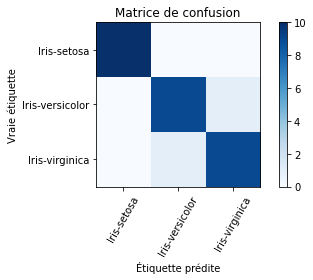


Rapport de classification:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

------------------------------------------------------------------------------------------ 



In [ ]:
validation_croisee = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
resultat_vc = cross_val_score(modele,predicteurs_ent,cibles_ent,cv=validation_croisee,scoring='accuracy')
print('>  %s: %f (%f)' % (nom_modele, resultat_vc.mean(), resultat_vc.std()))
modele.fit(predicteurs_ent, cibles_ent)
test_predictions = modele.predict(predicteurs_test)
print('>  %s: - Erreur de classification sur les données test: %d' % 
(nom_modele, (cibles_test != test_predictions).sum()))
print('>  %s- Exactitude: %.2f' % 
(nom_modele, accuracy_score(cibles_test, test_predictions)))
# Affichage d'une matrice de confusion et d'un rapport de classification
print("Matrice de confusion:\n")
afficher_matrice_confusion(confusion_matrix(cibles_test, test_predictions),['Iris-setosa','Iris-versicolor', 'Iris-virginica'])
print("\nRapport de classification:\n",classification_report(cibles_test, test_predictions))
print("-"*90,"\n")
